# Problemas de distribución de probabilidad

In [23]:
from scipy.stats import binom, norm, uniform
import numpy as np
import matplotlib.pyplot as plt

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

### Definir todas las funciones de probabilidad relacionadas con esta distribución.

In [24]:
def pmf_binomial(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k=x, n=size, p=prob, loc=0)
    return result

def cdf_binomial(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k=q, n=size, p=prob, loc=0)
    return result

def ppf_binomial(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q=p, n=size, p=prob, loc=0)
    return result

def rvz_binomial(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n=size, p=prob, size=n)
    return result

### Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo

In [25]:
np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {pmf_binomial(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {cdf_binomial(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {ppf_binomial(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rvz_binomial(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


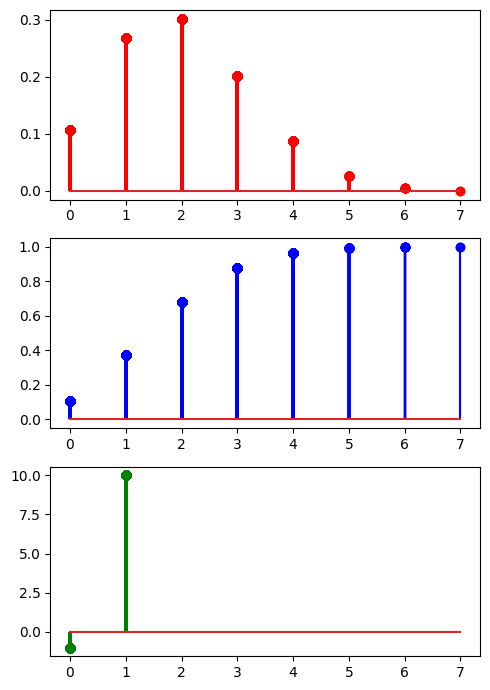

In [26]:
np.random.seed(42)

size = 10
prob = 0.2
data = rvz_binomial(2000, size = 10, prob = 0.2)

pmf = pmf_binomial(data, size = size, prob = prob)
cdf = cdf_binomial(data, size = size, prob = prob)
ppf = ppf_binomial(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

### Distribución Normal

In [42]:
def pdf_normal(x, mu=0, sigma=1):
    """
    Calcula la estimación puntual de la distribución normal.
    """
    result = norm.pdf(x, loc=mu, scale=sigma)
    return result

def cdf_normal(q, mu=0, sigma=1):
    """
    Calcula el acumulado de la distribución normal.
    """
    result = norm.cdf(q, loc=mu, scale=sigma)
    return result

def ppf_normal(p, mu=0, sigma=1):
    """
    Calcula la función cuantil a partir de la distribución normal.
    """
    result = norm.ppf(p, loc=mu, scale=sigma)
    return result

def rvs_normal(n, mu=0, sigma=1):
    """
    Genera variables aleatorias a partir de la distribución normal.
    """
    result = norm.rvs(loc=mu, scale=sigma, size=n)
    return result

In [44]:
np.random.seed(42)

print(f"Probability that a Normal(10, 0.2) takes the value 2: {pdf_normal(2, mu=10, sigma=0.2)}")
print(f"Probability that a Normal(10, 0.2) will take a value less than 2: {cdf_normal(2, mu=10, sigma=0.2)}")
print(f"Which value of a Normal(10, 0.2) has a cumulative probability of 0.9? {ppf_normal(0.9, mu=10, sigma=0.2)}")
print(f"Generate 5 random values from a Normal(10, 0.2) distribution: {rvs_normal(5, mu=10, sigma=0.2)}")

Probability that a Normal(10, 0.2) takes the value 2: 0.0
Probability that a Normal(10, 0.2) will take a value less than 2: 0.0
Which value of a Normal(10, 0.2) has a cumulative probability of 0.9? 10.25631031310892
Generate 5 random values from a Normal(10, 0.2) distribution: [10.09934283  9.97234714 10.12953771 10.30460597  9.95316933]


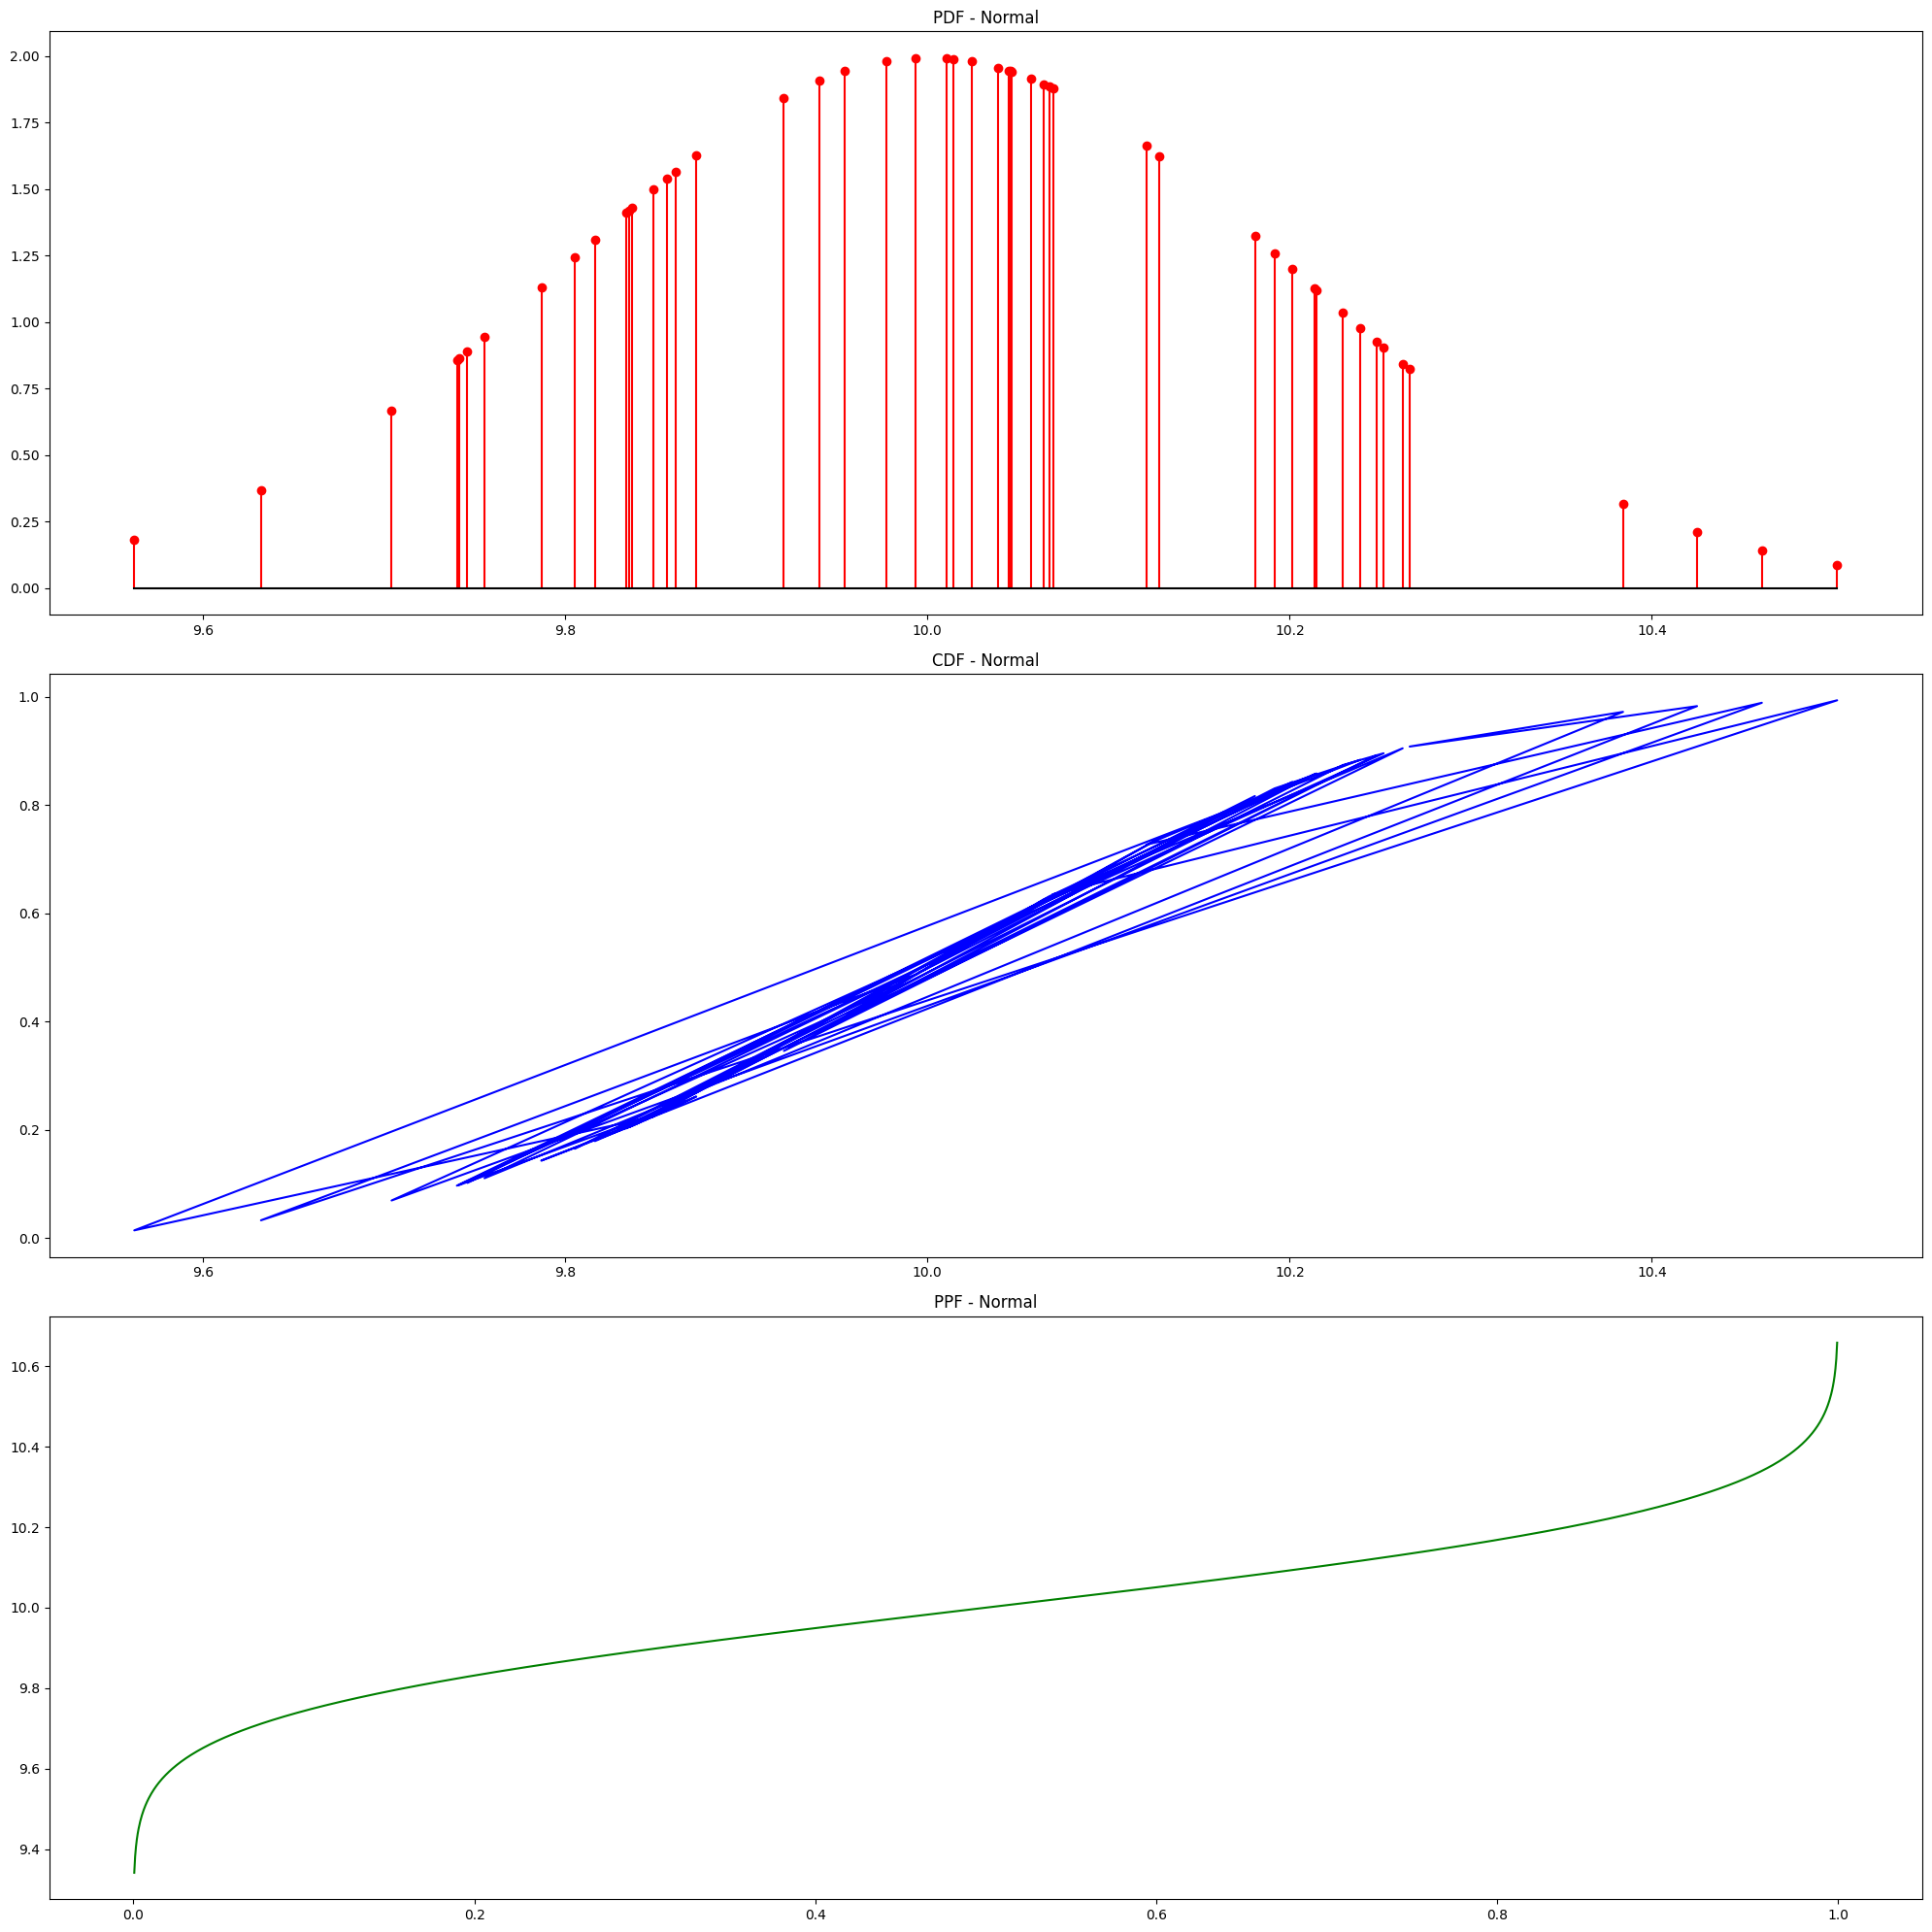

In [53]:
mu = 10
sigma = 0.2
data_normal = rvs_normal(2000, mu=mu, sigma=sigma)
# hay que reemplazar los parametros de acuerdo a la función normal. Los de la binomial no existen para una normal.
pdf_vals = pdf_normal(data_normal, mu=mu, sigma=sigma)
cdf_vals = cdf_normal(data_normal, mu=mu, sigma=sigma)
ppf_vals = ppf_normal(np.linspace(0, 1, 2000), mu=mu, sigma=sigma)

fig, axis = plt.subplots(3, 1, figsize=(20, 20))

axis[0].stem(data_normal[:50], pdf_vals[:50], linefmt="r-", markerfmt="ro", basefmt="k-")
axis[0].set_title("PDF - Normal")

axis[1].plot(data_normal[:50], cdf_vals[:50], "b-")
axis[1].set_title("CDF - Normal")

axis[2].plot(np.linspace(0, 1, 2000), ppf_vals, "g-")
axis[2].set_title("PPF - Normal")

plt.tight_layout()
plt.show()

### Distribución uniforme

In [47]:
def pdf_uniform(x, a=0, b=1):
    """
    Calcula la estimación puntual de la distribución uniforme.
    """
    return uniform.pdf(x, loc=a, scale=b - a)

def cdf_uniform(q, a=0, b=1):
    """
    Calcula el acumulado de la distribución uniforme.
    """    
    return uniform.cdf(q, loc=a, scale=b - a)

def ppf_uniform(p, a=0, b=1):
    """
    Calcula la función cuantil a partir de la distribución uniforme.
    """    
    return uniform.ppf(p, loc=a, scale=b - a)

def rvs_uniform(n, a=0, b=1):
    """
    Genera variables aleatorias a partir de la distribución uniforme.
    """
    return uniform.rvs(loc=a, scale=b - a, size=n)

# def pdf_uniform(x, size, prob = 0.5):
#     """
#     Calcula la estimación puntual de la distribución uniforme.
#     """
#     result = uniform.pdf(k=x, n=size, p=prob, loc=0)
#     return result

# def cdf_uniform(q, size, prob = 0.5):
#     """
#     Calcula el acumulado de la distribución uniforme.
#     """
#     result = uniform.cdf(k=q, n=size, p=prob, loc=0)
#     return result

# def ppf_uniform(p, size, prob = 0.5):
#     """
#     Calcula la función cuantil a partir de la distribución uniforme.
#     """
#     result = uniform.ppf(q=p, n=size, p=prob, loc=0)
#     return result

# def rvs_uniform(n, size, prob = 0.5):
#     """
#     Genera variables aleatorias a partir de la distribución uniforme.
#     """
#     result = uniform.rvs(n=size, p=prob, size=n)
#     return result

In [48]:
np.random.seed(42)

print(f"Probability density at x=3 for Uniform(2, 5): {pdf_uniform(3, a=2, b=5)}")
print(f"Cumulative probability at x=3 for Uniform(2, 5): {cdf_uniform(3, a=2, b=5)}")
print(f"Value with cumulative probability 0.8 for Uniform(2, 5): {ppf_uniform(0.8, a=2, b=5)}")
print(f"Generate 2000 random values from a Uniform(2, 5): {rvs_uniform(2000, a=2, b=5)}")

Probability density at x=3 for Uniform(2, 5): 0.3333333333333333
Cumulative probability at x=3 for Uniform(2, 5): 0.3333333333333333
Value with cumulative probability 0.8 for Uniform(2, 5): 4.4
Generate 2000 random values from a Uniform(2, 5): [3.12362036 4.85214292 4.19598183 ... 2.20687405 2.17116416 2.84656122]


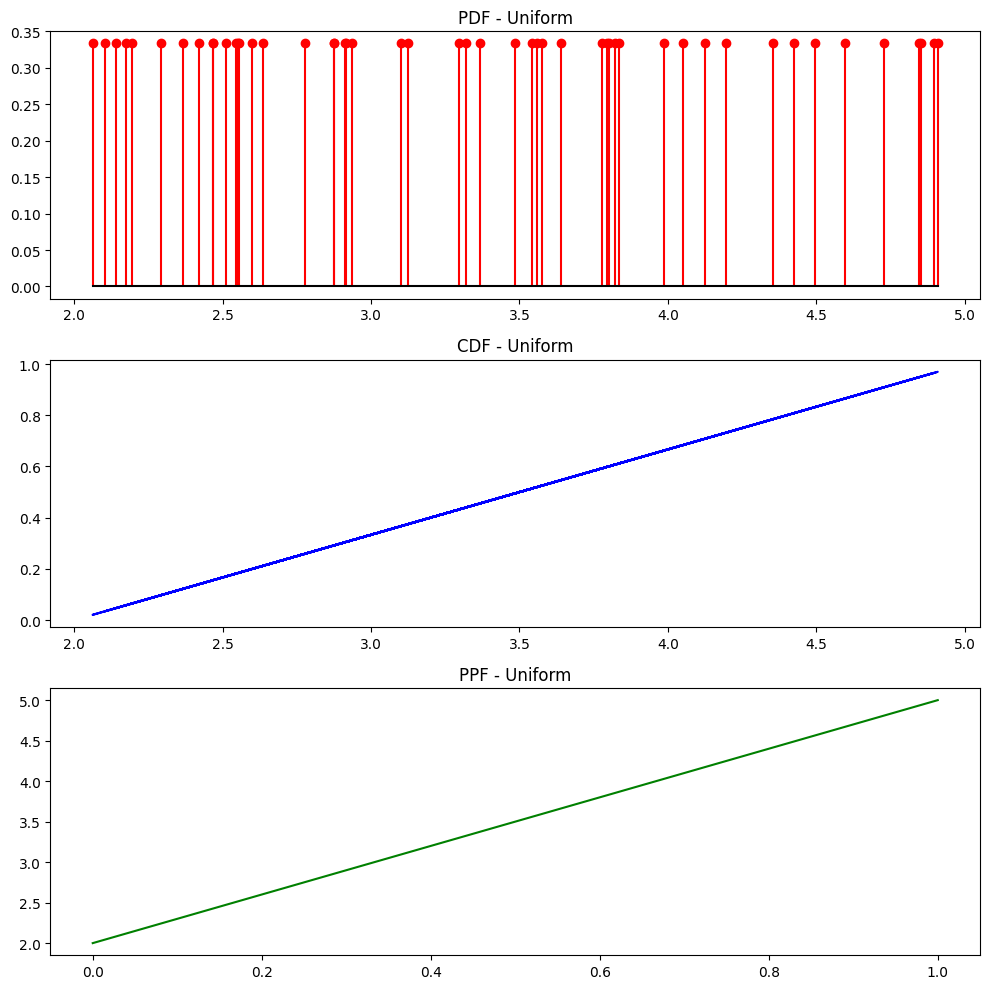

In [ ]:
np.random.seed(42)

a = 2
b = 5
data_uniform = rvs_uniform(2000, a=a, b=b)

pdf_vals_u = pdf_uniform(data_uniform, a=a, b=b)
cdf_vals_u = cdf_uniform(data_uniform, a=a, b=b)
ppf_vals_u = ppf_uniform(np.linspace(0, 1, 2000), a=a, b=b)

fig, axis = plt.subplots(3, 1, figsize=(10, 10))

axis[0].stem(data_uniform[:50], pdf_vals_u[:50], linefmt="r-", markerfmt="ro", basefmt="k-")
axis[0].set_title("PDF - Uniform")

axis[1].plot(data_uniform[:50], cdf_vals_u[:50], "b-")
axis[1].set_title("CDF - Uniform")

axis[2].plot(np.linspace(0, 1, 2000), ppf_vals_u, "g-")
axis[2].set_title("PPF - Uniform")

plt.tight_layout()
plt.show()